# DATA SCIENCE PROJECT ON RICE LEAF DISEASE DETECTION

## This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

### Classes
#### Leaf smut
Brown spot
Bacterial leaf blight

## PYTHON IMPLIMENTATION

In [1]:
# Importing Libraries

import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

## MAKE SUBSET OF TRAIN, TEST, VALIDATION

In [2]:
import splitfolders
splitfolders.ratio(r"C:\Users\Lenovo\Downloads\bacterical disease-20220923T063120Z-001\bacterical disease", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 120 files [00:03, 31.06 files/s]


In [3]:
# Sorting the path of data into variable
train_dir = r'C:\Users\Lenovo\Downloads\bacterical disease-20220923T063120Z-001\output\train'  #Location of training images
validation_dir = r'C:\Users\Lenovo\Downloads\bacterical disease-20220923T063120Z-001\output\val' # Location of test images
test_dir =r'C:\Users\Lenovo\Downloads\bacterical disease-20220923T063120Z-001\output\test' # Location of test images

## GENERATING TRAINING AND VALIDATION BATCHES OF IMAGES

In [4]:
# Generating batches of image data
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))




train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')




Found 96 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


## PLOTTING TRAIN IMAGES WITH THEIR LABELS

In [5]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])


# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

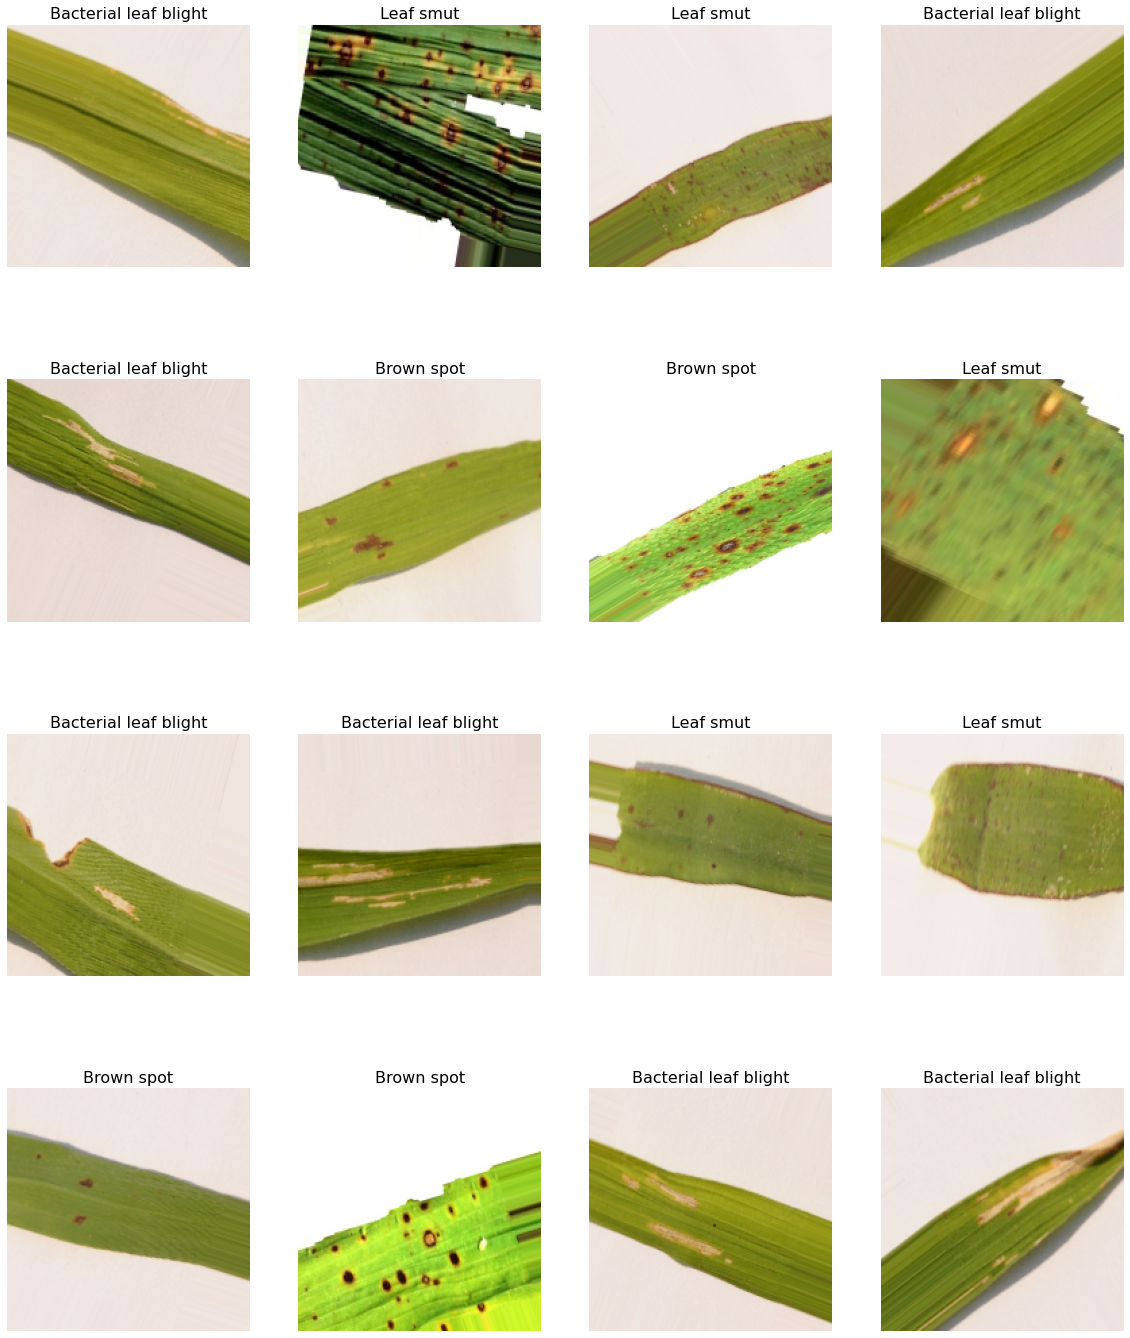

In [6]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

## CNN MODEL ARCHITECTURE

In [7]:
from keras.layers.core.activation import Activation
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(180,180,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation ='softmax'))

## SUMMARY OF MODEL

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

## COMPILE MODEL

In [9]:
from tensorflow.keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Train Model

In [10]:
# Fitting the data
    
history = model.fit_generator(train_generator,
    epochs=30, # epochs used to how many itertion (1fp + loss + 1bp)
    validation_data = val_generator,
)

Epoch 1/30
6/6 [==============================] - 16s 2s/step - loss: 1.1236 - accuracy: 0.3021 - val_loss: 1.1015 - val_accuracy: 0.3333
Epoch 2/30
6/6 [==============================] - 11s 2s/step - loss: 1.0836 - accuracy: 0.3958 - val_loss: 1.0902 - val_accuracy: 0.3333
Epoch 3/30
6/6 [==============================] - 11s 2s/step - loss: 1.0203 - accuracy: 0.4479 - val_loss: 1.1646 - val_accuracy: 0.3333
Epoch 4/30
6/6 [==============================] - 11s 2s/step - loss: 1.0995 - accuracy: 0.4167 - val_loss: 1.1172 - val_accuracy: 0.4167
Epoch 5/30
6/6 [==============================] - 12s 2s/step - loss: 1.0052 - accuracy: 0.4167 - val_loss: 1.0586 - val_accuracy: 0.5000
Epoch 6/30
6/6 [==============================] - 13s 2s/step - loss: 1.0065 - accuracy: 0.5729 - val_loss: 1.0423 - val_accuracy: 0.5833
Epoch 7/30
6/6 [==============================] - 12s 2s/step - loss: 0.9368 - accuracy: 0.5625 - val_loss: 1.0457 - val_accuracy: 0.5000
Epoch 8/30
6/6 [==================

### AFTER TRAINING

* Training accuracy - 82.29%
* Validation accuracy - 75.00%

## MODEL SAVING

In [11]:
model.save("model.h5")

## PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS

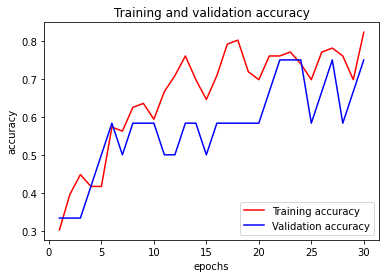

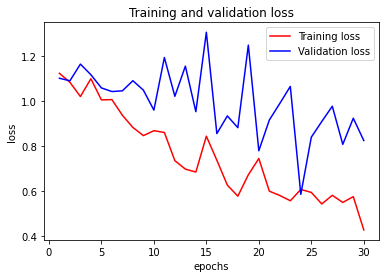

In [12]:
# Step:9 Plotting the training accuracy and validation accuracy
# Plotting the traning loss and validation loss
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## CREATED MODEL SUMMARY

In [13]:
model = tf.keras.models.load_model("model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

## EVALUATION AND TESTING MODEL

In [14]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=16,
    color_mode='rgb',
    class_mode='categorical')

Found 12 images belonging to 3 classes.


In [15]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 920ms/step - loss: 0.9246 - accuracy: 0.5833


[0.9245527386665344, 0.5833333134651184]

* Here the loss is 0.92 and the accuracy of the model is 0.58 percent means 58%.

## VISUALISE THE PREDICTION OF MODEL

1/1 [==============================] - 0s 59ms/step


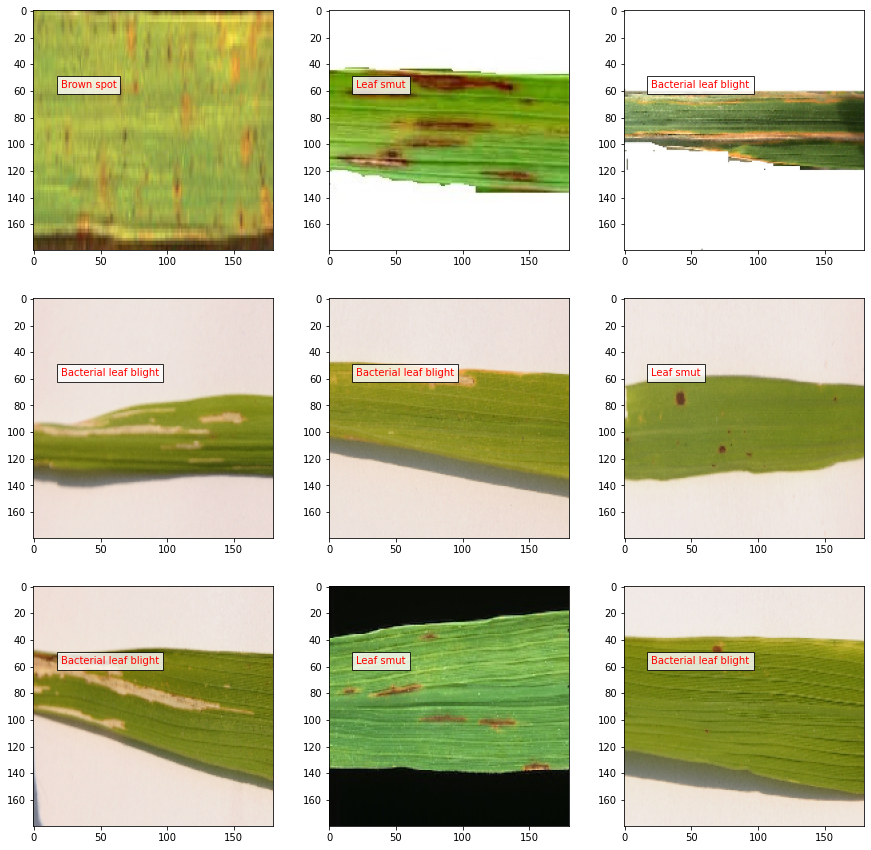

In [16]:
# Visualise the prediction of the model
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])